# **<노드 실습>**

## **노드 2 - 미니프로젝트: 가위바위보 분류기를 만들자**

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.18.0
2.0.2


In [ ]:
## 압축 해제 코드 -
# 만든 데이터를 Colab에 올려주세요
# 압축파일 이름을 맞춰주세요~

!unzip /content/가위-samples.zip -d /content/가위
!unzip /content/바위-samples.zip -d /content/바위
!unzip /content/보-samples.zip   -d /content/보

Archive:  /content/가위-samples.zip
replace /content/가위/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/바위-samples.zip
replace /content/바위/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/보-samples.zip
replace /content/보/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
## 여기서 사용된 코드가 업데이트 된 부분이있습니다

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./가위"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "./바위"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
image_dir_path = "./보"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np

# 셔플 함수를 넣어봤습니다
from sklearn.utils import shuffle

# 저희가 만든 데이터는 개수가 300개가 아닐수있습니다
# 아래 함수의 인자가 조금 바뀐것에 주의하세요


def load_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위/*.jpg') + \
                 glob.glob(f'./바위/*.jpg') + \
                 glob.glob(f'./보/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


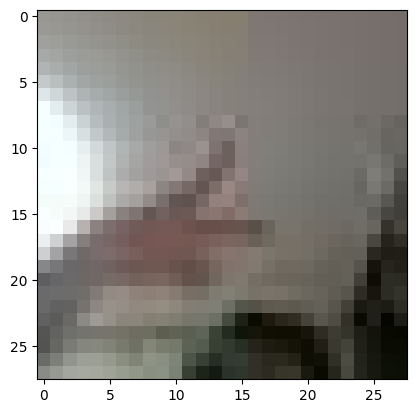

In [ ]:
## 사진 화질이 말도안되는데...? 이걸 알아맞춘다고...?

import matplotlib.pyplot as plt

plt.imshow(x_train[224])
print('라벨: ', y_train[224])

In [ ]:
# ## ! LMS에서도 이거 추가해줘야합니다
from tensorflow import keras

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요.
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 왜 정확도가 100퍼센트가 나올까?

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3600 - loss: 35.4665
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4275 - loss: 2.6663
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5289 - loss: 1.2006
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6473 - loss: 0.7969
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6534 - loss: 0.7753
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7477 - loss: 0.6033
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7461 - loss: 0.6556
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7547 - loss: 0.5241
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8351 - loss: 0.3621
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8972 - loss: 0.2819


In [ ]:
## 압축 해제 코드 -
# 만든 데이터를 Colab에 올려주세요
# 압축파일 이름을 맞춰주세요~

# 6/5(목)에 같이 학습한 그루 '병기님'의 가위바위보 데이터를 받아서 넣어봤다! ㅋㅋ
!unzip /content/scissor_병기님.zip -d /content/가위2_test
!unzip /content/rock_병기님.zip -d /content/바위2_test
!unzip /content/paper_병기님.zip   -d /content/보2_test

Archive:  /content/scissor_병기님.zip
replace /content/가위2_test/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/rock_병기님.zip
replace /content/바위2_test/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/paper_병기님.zip
replace /content/보2_test/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np

# 셔플 함수를 넣어봤습니다
from sklearn.utils import shuffle

# 저희가 만든 데이터는 개수가 300개가 아닐수있습니다
# 아래 함수의 인자가 조금 바뀐것에 주의하세요


def load_test_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # 데이터의 개수 자동 조정
    all_images = glob.glob(f'./가위2_test/*.jpg') + \
                 glob.glob(f'./바위2_test/*.jpg') + \
                 glob.glob(f'./보2_test/*.jpg')
    number_of_data = len(all_images)

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)



    idx=0
    for file in glob.iglob('./가위2_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./바위2_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./보2_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "."
(x_train, y_train)=load_data(image_dir_path)

x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = "./가위2_test"
resize_images(image_dir_path)

image_dir_path = "./바위2_test"
resize_images(image_dir_path)

image_dir_path = "./보2_test"
resize_images(image_dir_path)

image_dir_path = "."
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

165  images to be resized.
165  images resized.
133  images to be resized.
133  images resized.
170  images to be resized.
170  images resized.
테스트데이터(x_test)의 이미지 개수는 468 입니다.
x_test shape: (468, 28, 28, 3)
y_test shape: (468,)


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

15/15 - 0s - 18ms/step - accuracy: 0.3526 - loss: 20.4967
test_loss: 20.496658325195312 
test_accuracy: 0.35256409645080566
